In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Parte A – Carregando e entendendo os dados

1. Carregue os dados usando pandas.read_csv().

In [261]:
df = pd.read_csv('csvs/cs-training.csv', index_col=0)

In [262]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


2. Quantas entradas (linhas) e variáveis (colunas) o dataset possui?

In [263]:
df.shape

(150000, 11)

3. Verifique os tipos de dados de cada coluna. Há colunas que precisam ser
transformadas?

In [264]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [265]:
df["NumberOfDependents"] = df["NumberOfDependents"].astype("Int64")

4. Existem valores ausentes? Como tratá-los?

In [266]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

5. Há colunas que parecem irrelevantes ou redundantes?

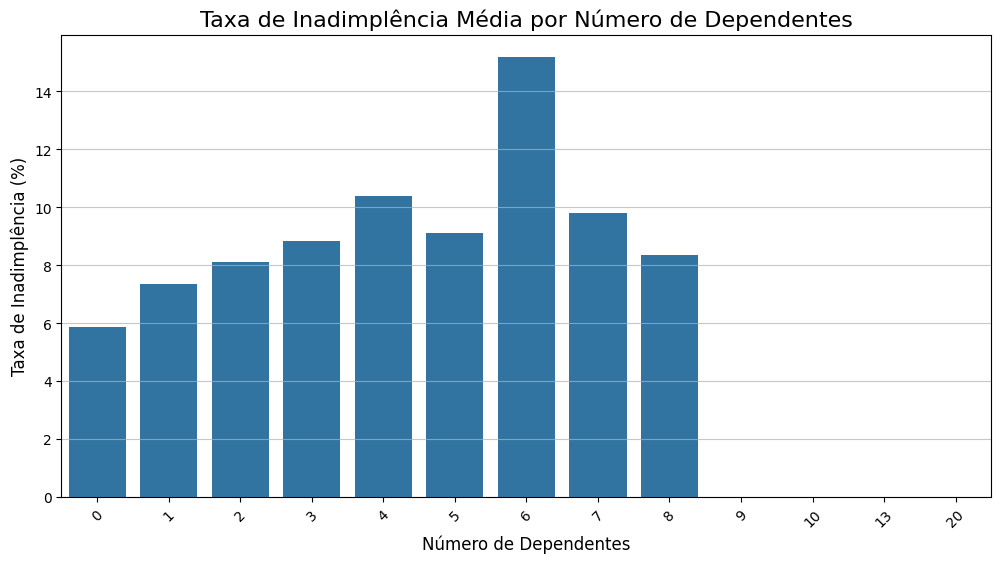

In [267]:
# a ideia desse gráfico é tentar entender se a variavel NumberOfDependents é irrelevante ou não para prever a inadimplência
inadimplencia_por_qtd_dependentes = df.groupby('NumberOfDependents')['SeriousDlqin2yrs'].mean().reset_index()
inadimplencia_por_qtd_dependentes['TaxaInadimplencia'] = inadimplencia_por_qtd_dependentes['SeriousDlqin2yrs'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='NumberOfDependents', y='TaxaInadimplencia', data=inadimplencia_por_qtd_dependentes)

plt.title('Taxa de Inadimplência Média por Número de Dependentes', fontsize=16)
plt.xlabel('Número de Dependentes', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()


/tmp/ipykernel_85325/2051753523.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inadimplencia_por_idade = df.groupby('AgeGroup')['SeriousDlqin2yrs'].mean().reset_index()


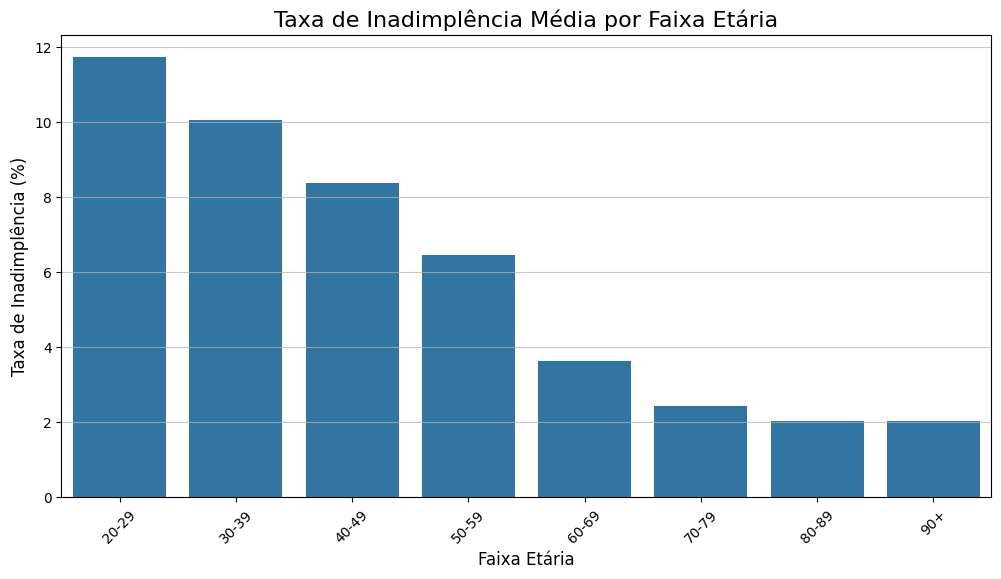

In [268]:
# a ideia desse gráfico é tentar entender se a variavel age é irrelevante ou não para prever a inadimplência
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 110]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

inadimplencia_por_idade = df.groupby('AgeGroup')['SeriousDlqin2yrs'].mean().reset_index()
inadimplencia_por_idade['TaxaInadimplencia'] = inadimplencia_por_idade['SeriousDlqin2yrs'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='TaxaInadimplencia', data=inadimplencia_por_idade)

plt.title('Taxa de Inadimplência Média por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()


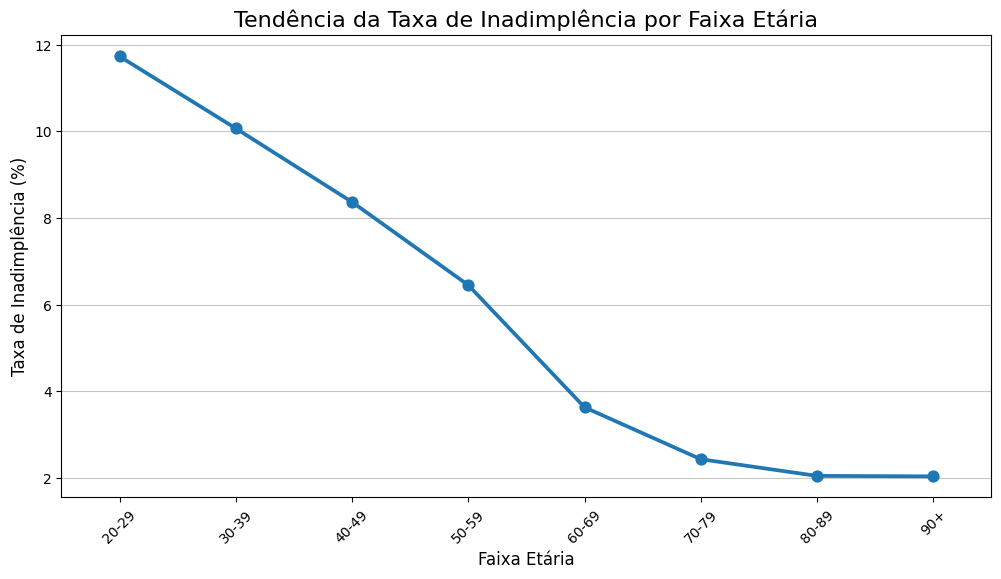

In [269]:
# plotando outro tipo de gráfico para visualizar a tendencia
plt.figure(figsize=(12, 6))

sns.pointplot(x='AgeGroup', y='TaxaInadimplencia', data=inadimplencia_por_idade)

plt.title('Tendência da Taxa de Inadimplência por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

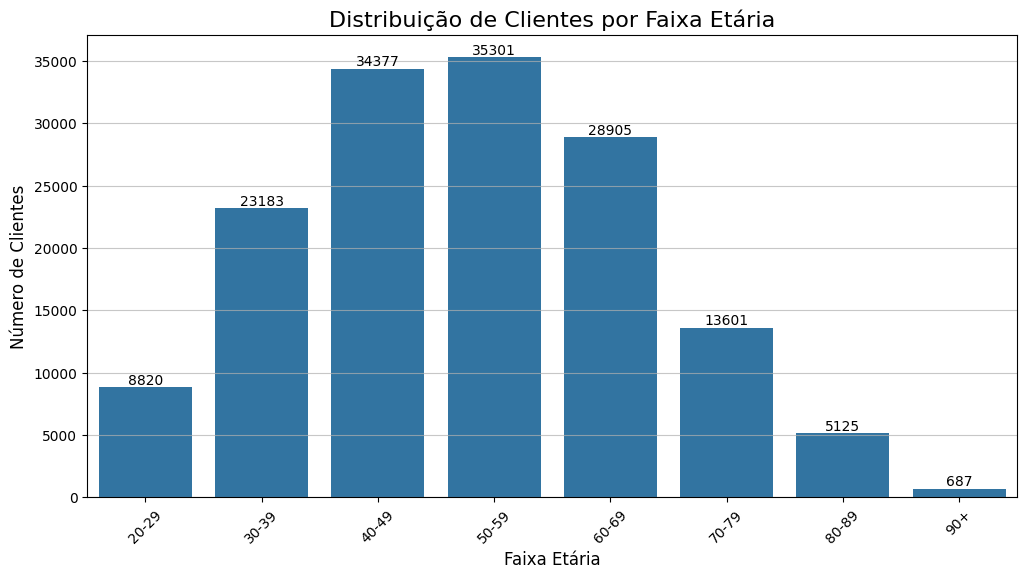

AgeGroup
20-29     8820
30-39    23183
40-49    34377
50-59    35301
60-69    28905
70-79    13601
80-89     5125
90+        687
Name: count, dtype: int64


In [270]:
# Tentando ver se a distribuição de idades está balanceada ou de certa forma enviesando a análise
contagem_por_faixa = df['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_por_faixa.index, y=contagem_por_faixa.values)

plt.title('Distribuição de Clientes por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)

for index, value in enumerate(contagem_por_faixa.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

print(contagem_por_faixa)

In [271]:
df = df.drop(columns=['AgeGroup'])

### Parte B - Carregando e entendendo os dados

#### B.1. Há correlação entre as variáveis?

1. Calcule e visualize a matriz de correlação entre as variáveis numéricas.

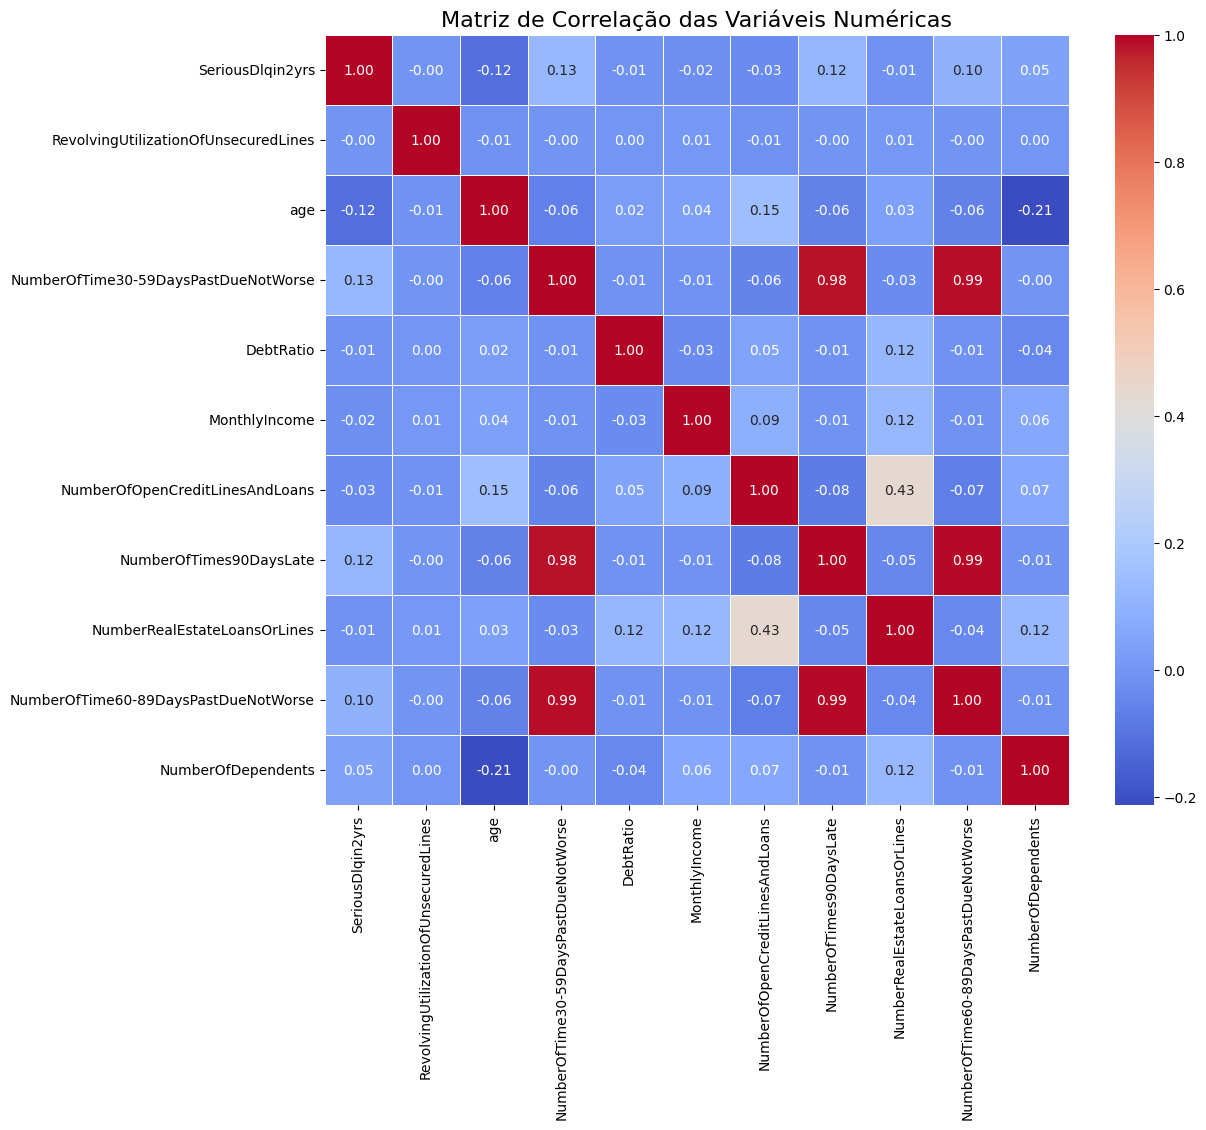

In [272]:
matriz_correlacao = df.corr()

plt.figure(figsize=(12, 10))


sns.heatmap(
    matriz_correlacao,
    annot=True,         
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=.5        
)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)

plt.show()

3. Use também uma matriz de dispersão (pairplot) para observar relações visuais
entre as variáveis mais importantes.

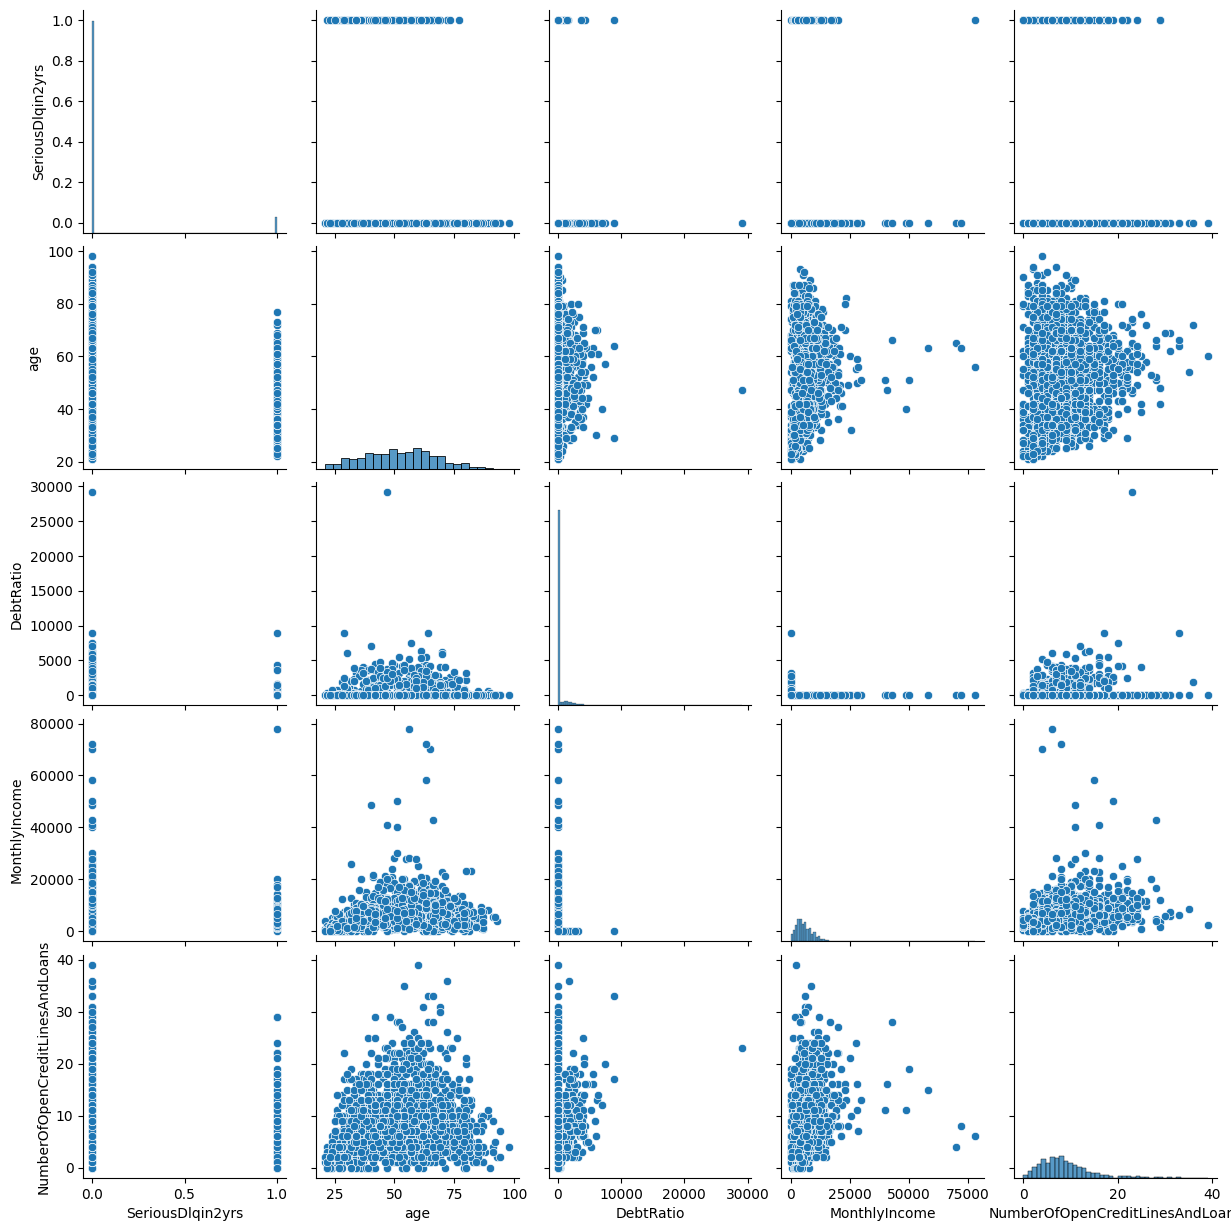

In [273]:
most_important_features = ["SeriousDlqin2yrs", "age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans"]
sample_df = df.sample(n=2000, random_state=42)
sns.pairplot(sample_df[most_important_features])

B.2 Delinquência e variáveis relacionadas

1. Qual a proporção de indivíduos com SeriousDlqin2yrs = 1?

In [274]:
df["SeriousDlqin2yrs"].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [275]:
proportion = (df["SeriousDlqin2yrs"] == 1).mean()

print(f"{proportion:.2%}")

6.68%


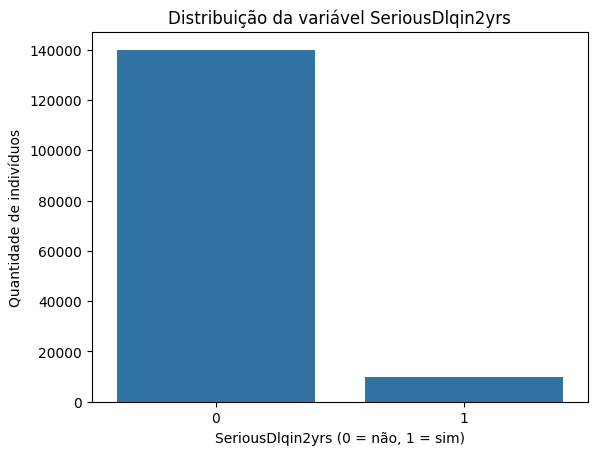

In [276]:
sns.countplot(x="SeriousDlqin2yrs", data=df)
plt.title("Distribuição da variável SeriousDlqin2yrs")
plt.xlabel("SeriousDlqin2yrs (0 = não, 1 = sim)")
plt.ylabel("Quantidade de indivíduos")
plt.show()

2. Existe relação entre idade e inadimplência?

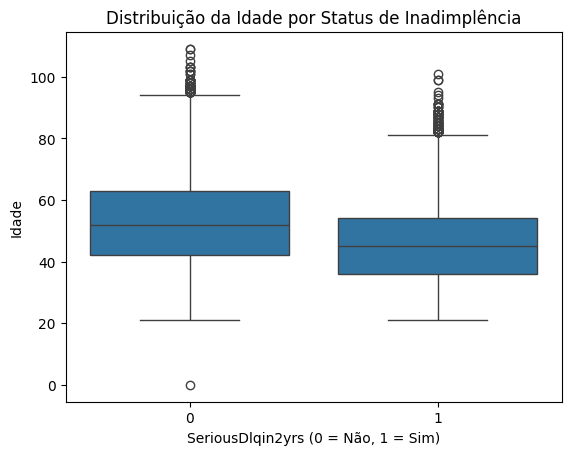

In [277]:
sns.boxplot(x="SeriousDlqin2yrs", y="age", data=df)
plt.title("Distribuição da Idade por Status de Inadimplência")
plt.xlabel("SeriousDlqin2yrs (0 = Não, 1 = Sim)")
plt.ylabel("Idade")
plt.show()

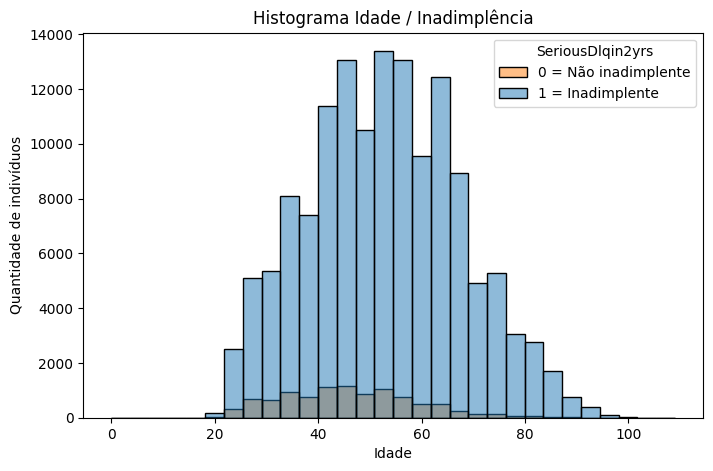

In [278]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="SeriousDlqin2yrs", bins=30, kde=False)
plt.title("Histograma Idade / Inadimplência")
plt.xlabel("Idade")
plt.ylabel("Quantidade de indivíduos")
plt.legend(title="SeriousDlqin2yrs", labels=["0 = Não inadimplente", "1 = Inadimplente"])
plt.show()

3. Existe relação entre número de linhas de crédito abertas ou atrasos e
inadimplência?

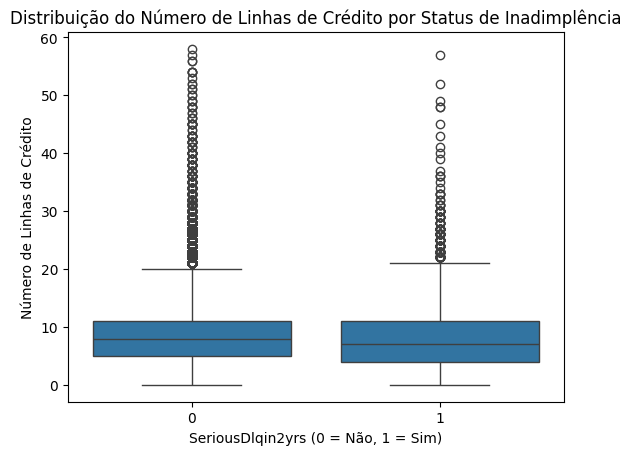

In [279]:
sns.boxplot(x="SeriousDlqin2yrs", y="NumberOfOpenCreditLinesAndLoans", data=df)
plt.title("Distribuição do Número de Linhas de Crédito por Status de Inadimplência")
plt.xlabel("SeriousDlqin2yrs (0 = Não, 1 = Sim)")
plt.ylabel("Número de Linhas de Crédito")
plt.show()

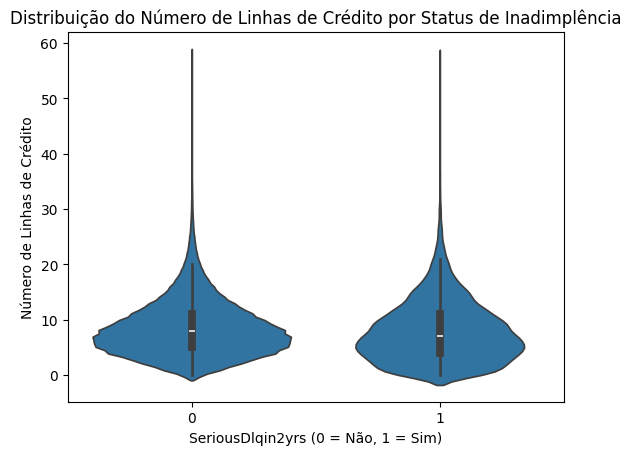

In [280]:
sns.violinplot(x="SeriousDlqin2yrs", y="NumberOfOpenCreditLinesAndLoans", data=df)
plt.title("Distribuição do Número de Linhas de Crédito por Status de Inadimplência")
plt.xlabel("SeriousDlqin2yrs (0 = Não, 1 = Sim)")
plt.ylabel("Número de Linhas de Crédito")
plt.show()

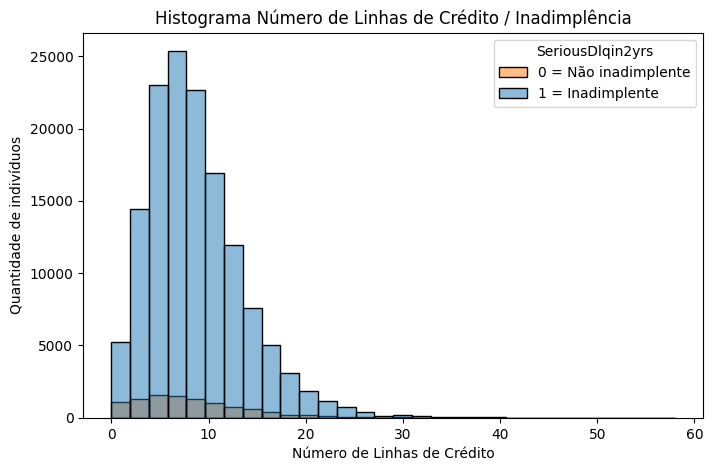

In [281]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="NumberOfOpenCreditLinesAndLoans", hue="SeriousDlqin2yrs", bins=30, kde=False)
plt.title("Histograma Número de Linhas de Crédito / Inadimplência")
plt.xlabel("Número de Linhas de Crédito")
plt.ylabel("Quantidade de indivíduos")
plt.legend(title="SeriousDlqin2yrs", labels=["0 = Não inadimplente", "1 = Inadimplente"])
plt.show()

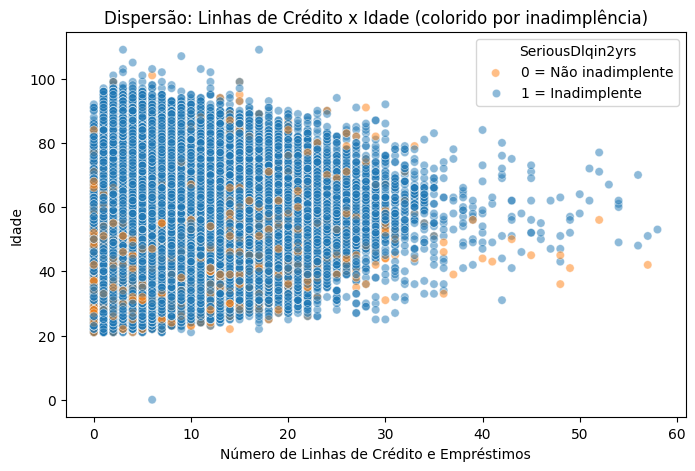

In [282]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="NumberOfOpenCreditLinesAndLoans",
    y="age",
    hue="SeriousDlqin2yrs",
    alpha=0.5
)

plt.title("Dispersão: Linhas de Crédito x Idade (colorido por inadimplência)")
plt.xlabel("Número de Linhas de Crédito e Empréstimos")
plt.ylabel("Idade")
plt.legend(title="SeriousDlqin2yrs", labels=["0 = Não inadimplente", "1 = Inadimplente"])
plt.show()

B.3 Criação de variáveis derivadas

In [283]:
# IncomePerDependent = MonthlyIncome / (NumberOfDependents + 1)
# df["IncomePerDependent"] = df["MonthlyIncome"] / (df["NumberOfDependents"] + 1)

In [284]:
# DebtPerLoan = DebtRatio / (NumberOfOpenCreditLinesAndLoans + 1)
df["DebtPerLoan"] = df["DebtRatio"] / (df["NumberOfOpenCreditLinesAndLoans"] + 1)

In [285]:
# soma total de atrasos.
df['TotalLatePayments'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate']

# variável binária indicando se já teve atraso
df['HasAnyLate'] = (df['TotalLatePayments'] > 0).astype(int)

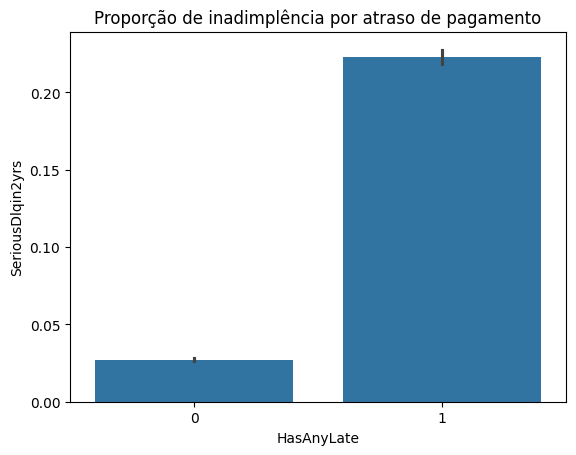

In [286]:
sns.barplot(x='HasAnyLate', y='SeriousDlqin2yrs', data=df, estimator='mean')
plt.title("Proporção de inadimplência por atraso de pagamento")
plt.show()


Parte C – Predição com aprendizado de máquina

Sessão extra de pré-processamento

In [287]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, precision_recall_curve, average_precision_score,
    roc_curve
)
from sklearn.calibration import CalibratedClassifierCV

# Opcional: imbalanced-learn para SMOTE
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, average_precision_score

In [288]:

df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

df["IncomePerDependent"] = df["MonthlyIncome"] / (df["NumberOfDependents"] + 1)

In [289]:
cols_continuous = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'DebtPerLoan',
    'IncomePerDependent'
]

for col in cols_continuous:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    df = df[
        (df[col] >= lim_inf) &
        (df[col] <= lim_sup)
    ]

df.shape

(103068, 15)

In [290]:
cols_late = ['TotalLatePayments']


limite_superior = 20  # você pode ajustar conforme a distribuição
df[col] = df[col].clip(upper=limite_superior)

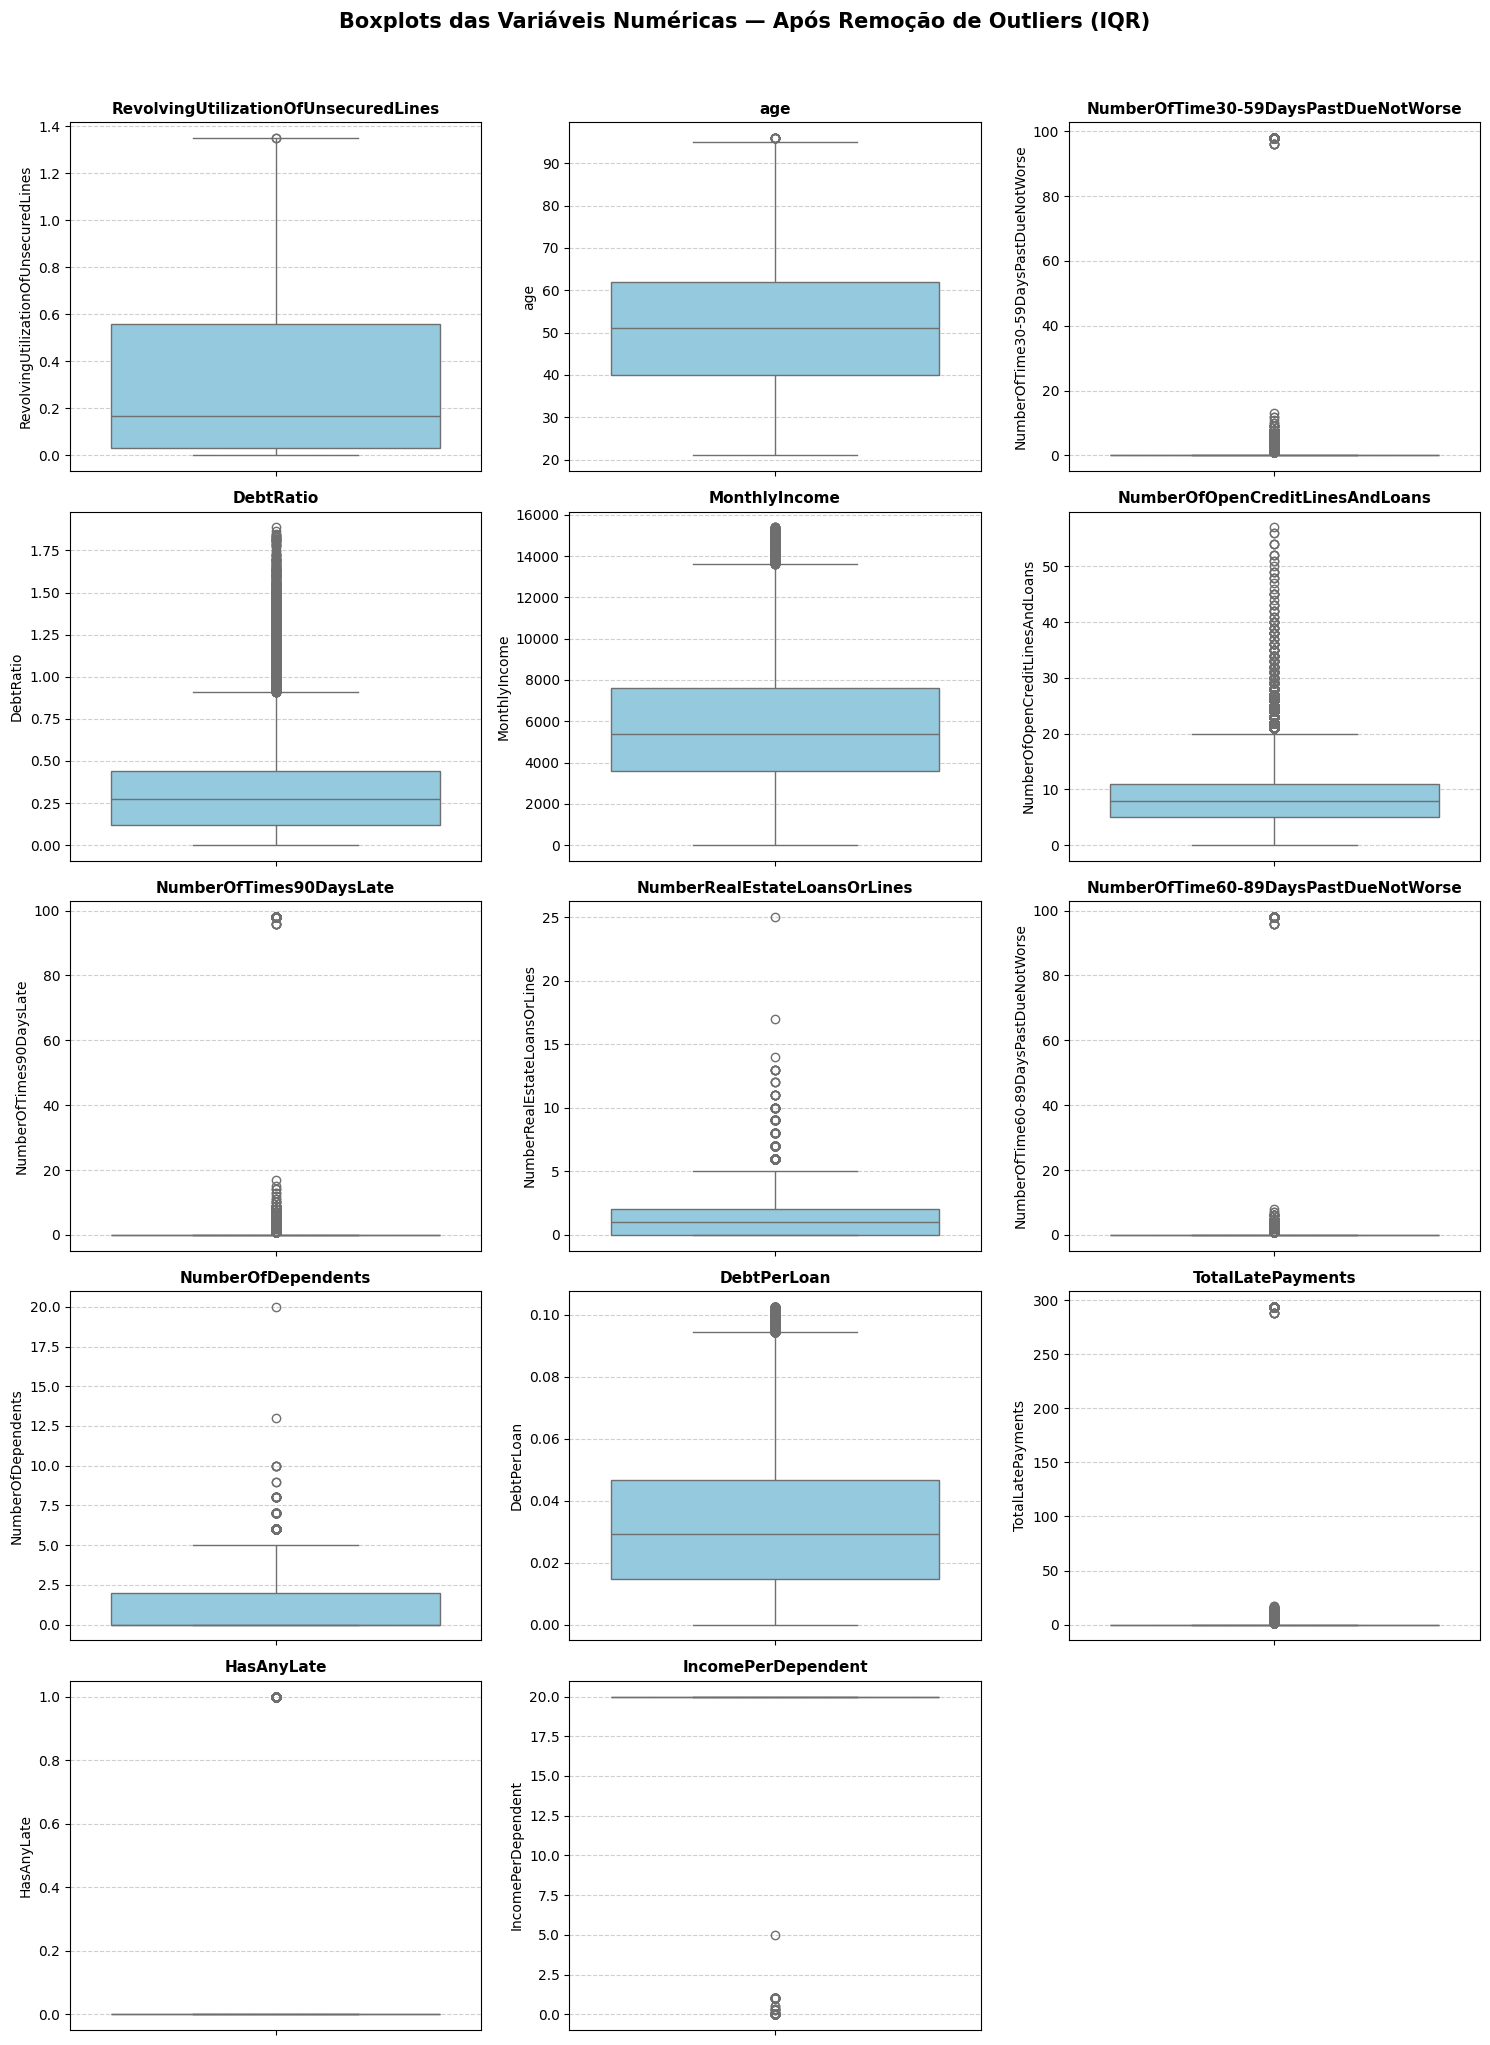

In [291]:
# Selecionar todas as colunas numéricas (exceto o alvo, se quiser)
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Opcional: remover o alvo se quiser visualizar apenas preditoras
colunas_numericas = [c for c in colunas_numericas if c != 'SeriousDlqin2yrs']

# Criar figura com vários subplots (3 colunas por linha)
n_cols = 3
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=11, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Boxplots das Variáveis Numéricas — Após Remoção de Outliers (IQR)', fontsize=15, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [292]:
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'].clip(lower=0))

In [293]:
df['DebtRatio_clipped'] = df['DebtRatio'].clip(upper=10) 
df['DebtPerLoan_clipped'] = df['DebtPerLoan'].clip(upper=100)  

In [294]:
# Remover colunas "redundantes" e combinar em uma unica variavel (TotalLatePayments)
df_backup = df.copy()
df.drop(columns=['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

C.1 Classificação binária – risco de inadimplência

In [212]:
# Selecão de colunas para o modelo
cols_to_use = [
    'RevolvingUtilizationOfUnsecuredLines', 'age',
    'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
 'NumberOfDependents', 'IncomePerDependent',
    'TotalLatePayments', 'MonthlyIncome_log', 'DebtRatio_clipped', 'DebtPerLoan_clipped'
]

X = df[cols_to_use]
y = df['SeriousDlqin2yrs']

X.shape


(103068, 10)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (72147, 10) Test: (30921, 10)


In [214]:
# Sem SMOTE
pipe_logreg = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000, solver='saga',
                                 class_weight='balanced', random_state=42))
])

pipe_nb = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

pipe_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000, solver='saga',
                                 class_weight='balanced', random_state=42))
])

In [215]:
# Usando SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe_logreg_smote = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy=1)),  
    ('model', LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced',
                                 random_state=42))
])

pipe_poly_smote = ImbPipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy=1)),
    ('model', LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced',
                                 random_state=42))
])


In [216]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'roc_auc': 'roc_auc',
    'pr_auc': make_scorer(average_precision_score, needs_proba=True)
}

param_logreg = {
    'model__C': [0.01, 0.1, 1, 10]
}

param_poly = {
    'poly__degree': [2],  
    'model__C': [0.01, 0.1, 1, 10]
}

param_logreg_smote = {
    'smote__sampling_strategy': [0.6, 0.8, 1.0],
    'model__C': [0.01, 0.1, 1, 10]
}

param_poly_smote = {
    'poly__degree': [2],
    'smote__sampling_strategy': [0.6, 0.8, 1.0],
    'model__C': [0.01, 0.1, 1, 10]
}

gscv_logreg = GridSearchCV(pipe_logreg, param_logreg, scoring=scoring,
                           cv=cv, n_jobs=-1, refit='pr_auc')
gscv_nb = GridSearchCV(pipe_nb, {'model__var_smoothing': [1e-9, 1e-8, 1e-7]},
                       scoring=scoring, cv=cv, n_jobs=-1, refit='pr_auc')
gscv_poly = GridSearchCV(pipe_poly, param_poly, scoring=scoring,
                         cv=cv, n_jobs=-1, refit='pr_auc')

# Versões com SMOTE 
gscv_logreg_smote = GridSearchCV(pipe_logreg_smote, param_logreg_smote, scoring=scoring,
                                 cv=cv, n_jobs=-1, refit='pr_auc')
gscv_poly_smote = GridSearchCV(pipe_poly_smote, param_poly_smote, scoring=scoring,
                               cv=cv, n_jobs=-1, refit='pr_auc')

USE_SMOTE = True

models_cv = (
    {
        'Logística': gscv_logreg,
        'NaiveBayes': gscv_nb,
        'LogísticaPolinomial': gscv_poly
    } if not USE_SMOTE else
    {
        'Logística+SMOTE': gscv_logreg_smote,
        'NaiveBayes': gscv_nb,                 
        'Polinomial+SMOTE': gscv_poly_smote
    }
)

In [217]:

results = []
for name, gscv in models_cv.items():
    print(f'CV + GridSearch -> {name}')
    gscv.fit(X_train, y_train)
    print('Best params:', gscv.best_params_,
          '| Best CV ROC-AUC:', gscv.cv_results_['mean_test_roc_auc'][gscv.best_index_],
          '| Best CV PR-AUC:', gscv.cv_results_['mean_test_pr_auc'][gscv.best_index_])
    results.append({
        'Modelo': name,
        'BestParams': gscv.best_params_,
        'CV_ROC_AUC': gscv.cv_results_['mean_test_roc_auc'][gscv.best_index_],
        'CV_PR_AUC': gscv.cv_results_['mean_test_pr_auc'][gscv.best_index_],
    })

results_df = pd.DataFrame(results)
display(results_df)



CV + GridSearch -> Logística+SMOTE


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.05s - Debugger warning: It seems that frozen modules are being used, which may
0

KeyboardInterrupt: 

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve,
                             precision_recall_curve)

evals = []

plt.figure(figsize=(12,5))
ax_roc = plt.subplot(1,2,1)
ax_pr = plt.subplot(1,2,2)

for name, gscv in models_cv.items():
    best = gscv.best_estimator_

    needs_calibration = ('NaiveBayes' in name)
    if needs_calibration and hasattr(best, 'predict_proba'):
        clf = CalibratedClassifierCV(best, cv=3)
        clf.fit(X_train, y_train)
    else:
        clf = best

    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    ap = average_precision_score(y_test, y_prob) if y_prob is not None else np.nan

    evals.append({
        'Modelo': name,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': roc,
        'PR-AUC': ap
    })

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        ax_roc.plot(fpr, tpr, label=f'{name} (AUC={roc:.3f})')
        pr, rc, _ = precision_recall_curve(y_test, y_prob)
        ax_pr.plot(rc, pr, label=f'{name} (AP={ap:.3f})')

ax_roc.plot([0,1],[0,1],'k--'); ax_roc.set_title('ROC'); ax_roc.set_xlabel('FPR'); ax_roc.set_ylabel('TPR'); ax_roc.legend()
ax_pr.set_title('Precision–Recall'); ax_pr.set_xlabel('Recall'); ax_pr.set_ylabel('Precision'); ax_pr.legend()
plt.tight_layout(); plt.show()

evals_df = pd.DataFrame(evals).sort_values('PR-AUC', ascending=False)
display(evals_df)

In [ ]:
best_name = evals_df.iloc[0]['Modelo']
best_est = models_cv[best_name].best_estimator_

y_pred = best_est.predict(X_test)
print('Melhor modelo:', best_name)
print('\nClassification report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto'); plt.ylabel('Real'); plt.title(f'Matriz de Confusão - {best_name}')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_est, X_test, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=42)
imp = pd.Series(r.importances_mean, index=X.columns)
imp.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,8))
plt.title('Importância das variáveis (Permutation Importance)')
plt.xlabel('Queda média no AUC')
plt.show()





- O número de atrasos anteriores foi o fator que mais impactou o modelo. Isso mostra que o histórico de atraso é o maior sinal de risco, quem atrasou antes, tem mais chance de atrasar de novo.
- A renda por dependente foi mais importante do que a renda bruta. Isso quer dizer que o modelo percebeu que o peso da renda muda conforme o tamanho da família. Quem tem muita gente pra sustentar com a mesma renda fica mais propenso a dever.
- A idade influenciou o modelo, mas não tanto quanto os atrasos ou a renda. Mesmo assim, dá pra ver que ela ajuda o modelo a entender o perfil: geralmente, quanto mais velho, menor o risco de inadimplência



In [ ]:
import joblib


model_path = 'modelo_polinomial_smote.pkl'

joblib.dump(best_est, model_path)


C.2 Classificação Multiclasse – níveis de inadimplência

In [295]:
df_backup['DelinquencyLevel'] = 0

df_backup.loc[df_backup['NumberOfTime30-59DaysPastDueNotWorse'] > 0, 'DelinquencyLevel'] = 1
df_backup.loc[df_backup['NumberOfTime60-89DaysPastDueNotWorse'] > 0, 'DelinquencyLevel'] = 2
df_backup.loc[df_backup['NumberOfTimes90DaysLate'] > 0, 'DelinquencyLevel'] = 3


In [296]:
df_backup.drop(columns=['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

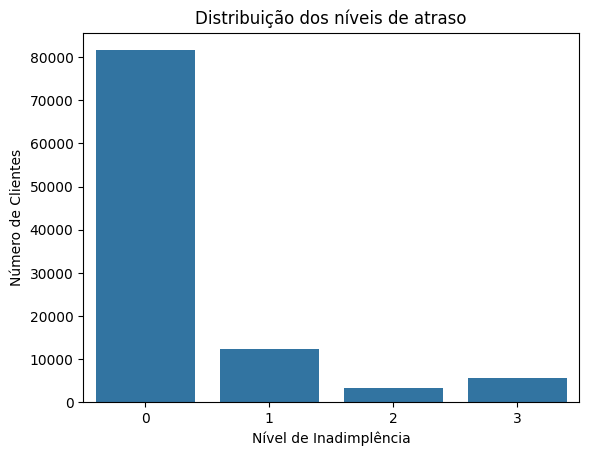

In [297]:

sns.countplot(x='DelinquencyLevel', data=df_backup)
plt.title('Distribuição dos níveis de atraso')
plt.xlabel('Nível de Inadimplência')
plt.ylabel('Número de Clientes')
plt.show()



In [298]:
X = df_backup[cols_to_use]
y = df_backup['DelinquencyLevel']

X.shape

(103068, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [ ]:
# Regressão Logística Multiclasse com SMOTE
pipe_log_multi = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        max_iter=5000,
        random_state=42))
])

# Naive Bayes
pipe_nb_multi = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', GaussianNB())
])

# Logística Polinomial Multiclasse
pipe_poly_multi = ImbPipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        max_iter=5000,
        random_state=42))
])

In [ ]:
modelos = {
    'Logística Multiclasse': pipe_log_multi,
    'Naive Bayes Multiclasse': pipe_nb_multi,
    'Polinomial Multiclasse': pipe_poly_multi
}

results = []

for nome, modelo in modelos.items():
    print(f'Treinando {nome}...')
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Modelo': nome,
        'Acurácia': acc,
        'F1-Macro': f1_macro,
        'F1-Weighted': f1_weighted
    })
    
    print(f'\n{nome} - Classification Report:\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

pd.DataFrame(results).sort_values('F1-Macro', ascending=False)

In [ ]:
import joblib


model_path = 'modelo_polinomial_multiclasse.pkl'
best_name = 'Polinomial Multiclasse'

joblib.dump(pipe_poly_multi, model_path)

In [ ]:
# Teste classificação binaria

loaded_model = joblib.load('modelo_polinomial_smote.pkl')
df_test = pd.read_csv('cs-test.csv')
df_test.fillna({'MonthlyIncome': df_test['MonthlyIncome'].median(), 'NumberOfDependents': df_test['NumberOfDependents'].median()}, inplace=True)
# carregar o dataset de teste

df_test["IncomePerDependent"] = df_test["MonthlyIncome"] / (df_test["NumberOfDependents"] + 1)
df_test["DebtPerLoan"] = df_test["DebtRatio"] / (df_test["NumberOfOpenCreditLinesAndLoans"] + 1)
df_test["Pagamentos_atrasados_Total"] = df_test['NumberOfTime30-59DaysPastDueNotWorse'] + df_test['NumberOfTime60-89DaysPastDueNotWorse'] + df_test['NumberOfTimes90DaysLate']


df_test['MonthlyIncome_log'] = np.log1p(df_test['MonthlyIncome'].clip(lower=0))
df_test['DebtRatio_clipped'] = df_test['DebtRatio'].clip(upper=10)
df_test['DebtPerLoan_clipped'] = df_test['DebtPerLoan'].clip(upper=100)

# Selecionar as colunas certas
X_new = df_test[cols_to_use]

# Gerar probabilidades de inadimplência
y_pred_proba = loaded_model.predict_proba(X_new)[:, 1]


In [ ]:


submission = pd.DataFrame({
    'Id': np.arange(1, len(y_pred_proba) + 1),
    'Probability': y_pred_proba
})
submission.to_csv('my_submission.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Probability'], bins=50, color='royalblue', edgecolor='black')
plt.title('Distribuição das Probabilidades de Inadimplência')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Teste multi
loaded_model = joblib.load('csvs/modelo_polinomial_multiclasse.pkl')

KeyError: 52

In [ ]:
df_test = pd.read_csv('csvs\cs-test.csv', index_col=0)
df_test.fillna({'MonthlyIncome': df_test['MonthlyIncome'].median(), 'NumberOfDependents': df_test['NumberOfDependents'].median()}, inplace=True)
df_test.drop(columns=['SeriousDlqin2yrs'], inplace=True)
# Carregar o dataset de teste
df_test["IncomePerDependent"] = df_test["MonthlyIncome"] / (df_test["NumberOfDependents"] + 1)
df_test["DebtPerLoan"] = df_test["DebtRatio"] / (df_test["NumberOfOpenCreditLinesAndLoans"] + 1)
df_test["Pagamentos_atrasados_Total"] = df_test['NumberOfTime30-59DaysPastDueNotWorse'] + df_test['NumberOfTime60-89DaysPastDueNotWorse'] + df_test['NumberOfTimes90DaysLate']
# Garantir que as mesmas features existam 
df_test['DelinquencyLevel'] = 0

df_test.loc[df_test['NumberOfTime30-59DaysPastDueNotWorse'] > 0, 'DelinquencyLevel'] = 1
df_test.loc[df_test['NumberOfTime60-89DaysPastDueNotWorse'] > 0, 'DelinquencyLevel'] = 2
df_test.loc[df_test['NumberOfTimes90DaysLate'] > 0, 'DelinquencyLevel'] = 3

# definir todos os valores de DelinquencyLevel como NaN
df_test['DelinquencyLevel'] = np.nan
# se existir a coluna em X_new (por segurança), atualizar também
df_test['MonthlyIncome_log'] = np.log1p(df_test['MonthlyIncome'].clip(lower=0))
df_test['DebtRatio_clipped'] = df_test['DebtRatio'].clip(upper=10)
df_test['DebtPerLoan_clipped'] = df_test['DebtPerLoan'].clip(upper=100)

cols_to_use = [
    'RevolvingUtilizationOfUnsecuredLines', 'age',
    'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
    'NumberOfDependents', 'IncomePerDependent',
    'Pagamentos_atrasados_Total', 'MonthlyIncome_log',
    'DebtRatio_clipped', 'DebtPerLoan_clipped'
]
X_new = df_test[cols_to_use]
if 'DelinquencyLevel' in X_new.columns:
    X_new['DelinquencyLevel'] = np.nan



y_pred = loaded_model.predict(X_new)

# Armazenar no DataFrame
df_test['DelinquencyLevel_pred'] = y_pred

# (opcional) salvar resultado
df_test[['DelinquencyLevel_pred']].to_csv('csvs/previsoes_multiclasse.csv')

In [ ]:
df_test.head()